In [20]:
import tensorflow as tf
import keras
import pandas as pd
dataset_path = tf.keras.utils.get_file("housing.data", "https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data")
column_names = ['CRIM','ZN','INDUS','CHAS','NOX',
                'RM', 'AGE', 'DIS','RAD','TAX','PTRATION', 'B', 'LSTAT', 'MEDV']
raw_dataset = pd.read_csv(dataset_path, names=column_names,
                      na_values = "?", comment='\t',
                      sep=" ", skipinitialspace=True)
# Create a dataset instant
dataset = raw_dataset.copy()
# This function returns last n rows from the object 
# based on position.
dataset.tail(n=10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATION,B,LSTAT,MEDV
496,0.28960,0.0,9.69,0,0.585,5.390,72.9,2.7986,6,391.0,19.2,396.90,21.14,19.7
497,0.26838,0.0,9.69,0,0.585,5.794,70.6,2.8927,6,391.0,19.2,396.90,14.10,18.3
498,0.23912,0.0,9.69,0,0.585,6.019,65.3,2.4091,6,391.0,19.2,396.90,12.92,21.2
499,0.17783,0.0,9.69,0,0.585,5.569,73.5,2.3999,6,391.0,19.2,395.77,15.10,17.5
500,0.22438,0.0,9.69,0,0.585,6.027,79.7,2.4982,6,391.0,19.2,396.90,14.33,16.8
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0,0.573,6.030,80.8,2.5050,1,273.0,21.0,396.90,7.88,11.9


In [21]:
# Split data into train/test
# p = training data portion

p=0.8
trainDataset = dataset.sample(frac=p,random_state=0)
testDataset = dataset.drop(trainDataset.index)

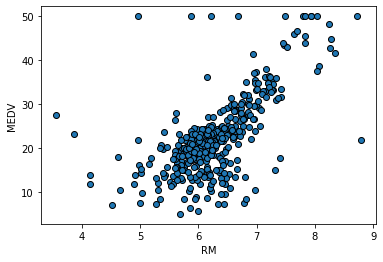

In [22]:
# Visual representation of training data
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
# With .pop() command, the associated columns are extracted.
x = trainDataset['RM']
y = trainDataset['MEDV']
ax.scatter(x, y, edgecolors=(0, 0, 0))
ax.set_xlabel('RM')
ax.set_ylabel('MEDV')
plt.show()

In [23]:
# Pop command return item and drop it from frame.
# After using trainDataset.pop('RM'), the 'RM' column 
# does not exist in the trainDataset frame anymore!
trainInput = trainDataset['RM']
trainTarget = trainDataset['MEDV']
testInput = testDataset['RM']
testTarget = testDataset['MEDV']

In [25]:
# We don't specify anything for activation -> no activation is applied (ie. "linear" activation: a(x) = x)
# Check: https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense
model = keras.Sequential([
     keras.layers.Dense(1, use_bias=True, input_shape=(1,))
    ])

In [26]:
# Adam optimizer
optimizer = tf.keras.optimizers.Adam(
    learning_rate=0.01, beta_1=0.9, beta_2=0.99, epsilon=1e-05, amsgrad=False,
    name='Adam')
  
# Model compiling settings
model.compile(loss='mse', optimizer=optimizer, metrics=['mae','mse'])

In [28]:
# A mechanism that stops training if the validation loss is not improving for more than n_idle_epochs.
n_idle_epochs = 100
earlyStopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=n_idle_epochs, min_delta=0.01)
# Creating a custom callback to print the log after a certain number of epochs
class NEPOCHLogger(tf.keras.callbacks.Callback):
    def __init__(self,per_epoch=100):
        '''
        display: Number of batches to wait before outputting loss
        '''
        self.seen = 0
        self.per_epoch = per_epoch
    
    def on_epoch_end(self, epoch, logs=None):
      if epoch % self.per_epoch == 0:
        print('Epoch {}, loss {:.2f}, val_loss {:.2f}, mae {:.2f}, val_mae {:.2f}, mse {:.2f}, val_mse {:.2f}'\
              .format(epoch, logs['loss'], logs['val_loss'],logs['mae'], logs['val_mae'],logs['mse'], logs['val_mse']))
        
# Call the object
log_display = NEPOCHLogger(per_epoch=100)
# Training loop
n_epochs = 2000
history = model.fit(
  trainInput, trainTarget, batch_size=256,
  epochs=n_epochs, validation_split = 0.1, verbose=0, callbacks=[earlyStopping,log_display])

Epoch 0, loss 1165.55, val_loss 1280.95, mae 32.77, val_mae 34.09, mse 1165.55, val_mse 1280.95
Epoch 100, loss 451.10, val_loss 533.50, mae 19.39, val_mae 20.68, mse 451.10, val_mse 533.50
Epoch 200, loss 137.65, val_loss 194.45, mae 9.24, val_mae 10.71, mse 137.65, val_mse 194.45
Epoch 300, loss 59.96, val_loss 100.43, mae 5.43, val_mae 7.04, mse 59.96, val_mse 100.43
Epoch 400, loss 56.44, val_loss 92.90, mae 5.38, val_mae 6.87, mse 56.44, val_mse 92.90
Epoch 500, loss 56.01, val_loss 92.34, mae 5.37, val_mae 6.84, mse 56.01, val_mse 92.34
Epoch 600, loss 55.23, val_loss 91.94, mae 5.32, val_mae 6.80, mse 55.23, val_mse 91.94
Epoch 700, loss 54.33, val_loss 91.39, mae 5.26, val_mae 6.75, mse 54.33, val_mse 91.39
Epoch 800, loss 53.38, val_loss 90.56, mae 5.21, val_mae 6.69, mse 53.38, val_mse 90.56
Epoch 900, loss 52.50, val_loss 90.14, mae 5.15, val_mae 6.64, mse 52.50, val_mse 90.14
Epoch 1000, loss 51.68, val_loss 89.45, mae 5.11, val_mae 6.59, mse 51.68, val_mse 89.45
Epoch 1100

In [29]:
print('keys:', history.history.keys())

keys: dict_keys(['loss', 'mae', 'mse', 'val_loss', 'val_mae', 'val_mse'])


<AxesSubplot:>

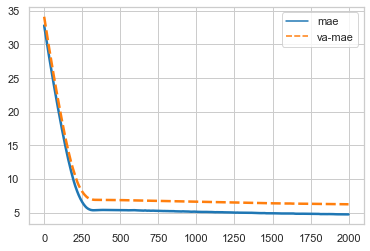

In [31]:
import numpy as np
import pandas as pd
import seaborn as sns
# Returning the desired values for plotting and turn to numpy array
mae = np.asarray(history.history['mae'])
val_mae = np.asarray(history.history['val_mae'])
# Creating the data frame
num_values = (len(mae))
values = np.zeros((num_values,2), dtype=float)
values[:,0] = mae
values[:,1] = val_mae
# Using pandas to frame the data
steps = pd.RangeIndex(start=0,stop=num_values)
data = pd.DataFrame(values, steps, columns=["mae", "va-mae"])
# Plotting
sns.set(style="whitegrid")
sns.lineplot(data=data, palette="tab10", linewidth=2.5)